# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete hw5-q1 about SVMs
2. You may create new cells for discussions or visualizations


In [1]:
# Install cvxopt with pip
#!pip install cvxopt

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

## a): Linearly Separable Dataset

In [3]:
data = np.loadtxt('clean_lin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, -1]

In [4]:
(x.T * y).T

array([[ 0.0478,  0.9555],
       [ 1.4237, -0.396 ],
       [ 0.2514,  0.8968],
       [ 0.2549,  0.7987],
       [ 0.3378,  0.7251],
       [ 0.5349,  0.5453],
       [ 0.7319,  0.5371],
       [ 0.7768,  0.7088],
       [ 0.6593,  0.8028],
       [ 0.9807,  0.766 ],
       [ 0.877 ,  0.439 ],
       [ 0.8321,  0.1733],
       [ 0.6524,  0.3082],
       [ 1.4231,  0.9213],
       [ 1.2814,  0.6515],
       [ 1.3021,  0.3777],
       [ 1.1915,  0.1896],
       [ 1.0913, -0.1374],
       [ 1.4438,  0.112 ],
       [-0.0959, -0.3368],
       [-0.0752, -0.1569],
       [-0.1789, -0.2101],
       [-0.2549, -0.3368],
       [-0.324 , -0.2509],
       [-0.4934, -0.1651],
       [-0.5971, -0.0343],
       [-0.6005,  0.1169],
       [-0.718 ,  0.2355],
       [-0.5452,  0.3009],
       [-0.2272,  0.3091],
       [-0.7802,  0.3418],
       [-0.9565,  0.3377],
       [-0.1028,  0.3091],
       [-0.0579,  0.0188],
       [-0.1927, -0.0547],
       [-0.3862,  0.3091]])

In [5]:
Q = matrix(np.diag([1.,1.,0.]))
p = matrix(np.zeros(3))
G = matrix((-1 * np.hstack(((x.T * y).T, y[:,None]))))
h = matrix((-1 * np.ones(x.shape[0])))


solution = solvers.qp(Q,p,G,h)

     pcost       dcost       gap    pres   dres
 0:  1.5173e+00  3.7821e+01  1e+02  2e+00  3e+01
 1:  1.3803e+01  9.6371e+00  3e+01  5e-01  7e+00
 2:  2.1717e+01  1.7415e+01  3e+01  4e-01  6e+00
 3:  3.9769e+01  3.8469e+01  8e+00  7e-02  1e+00
 4:  4.3534e+01  4.3375e+01  5e-01  4e-03  6e-02
 5:  4.3726e+01  4.3699e+01  3e-02  8e-06  1e-04
 6:  4.3723e+01  4.3721e+01  1e-03  4e-07  5e-06
 7:  4.3723e+01  4.3723e+01  1e-05  4e-09  5e-08
Optimal solution found.


In [6]:
solution

{'x': <3x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <36x1 matrix, tc='d'>,
 'z': <36x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 1.2351050732129998e-05,
 'relative gap': 2.824869509847119e-07,
 'primal objective': 43.722565192948956,
 'dual objective': 43.72255316245894,
 'primal infeasibility': 3.6658505120358153e-09,
 'dual infeasibility': 4.8823395494201985e-08,
 'primal slack': 8.018556690959323e-09,
 'dual slack': 3.172431909201818e-08,
 'iterations': 7}

In [7]:
z = np.ravel(solution['x'])

w = z[:2]
b = z[-1]

In [8]:
print("Weights: ", w.T)
print("Bias: ", b)


Weights:  [6.83386258 6.38305982]
Bias:  -5.425670975889619


In [9]:
x[:,0].max()

1.4438

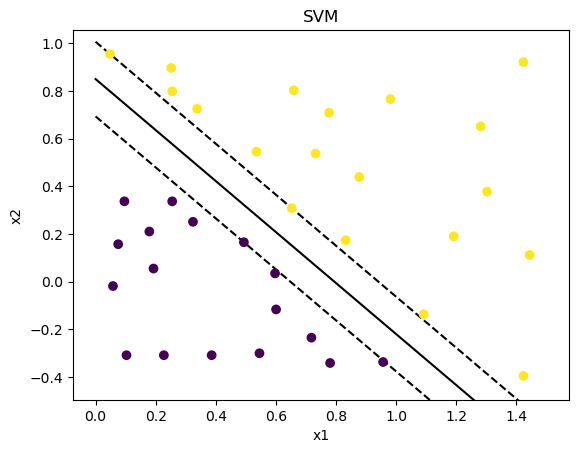

In [10]:
# plot the data
margin = 1/np.linalg.norm(w[1])

plt.scatter(x[:, 0], x[:, 1], c=y, zorder=10)

# plot the separating hyperplaneusing w and b
x_hyperplane = np.linspace(0,1.5)
y_hyperplane = - (w[0] * x_hyperplane + b) / w[1]
upper_margin = y_hyperplane + margin
lower_margin = y_hyperplane - margin
plt.plot(x_hyperplane, y_hyperplane, 'k-')
plt.plot(x_hyperplane, upper_margin, 'k--')
plt.plot(x_hyperplane, lower_margin, 'k--')
plt.ylim([x[:,1].min()-0.1, x[:,1].max()+0.1])
plt.title('SVM')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## b) and c) : Linearly Non-separable Dataset

In [11]:
# Load the data set that is not linearly separable
data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]



In [12]:
c = 0.05
def soft_svm(x, y, c=0.05):
    Q = matrix(np.diag(np.hstack((np.ones(x.shape[1]),np.zeros(x.shape[0]+1)))))
    p = matrix(np.hstack((np.zeros(x.shape[1]+1),np.full(x.shape[0], c))))

    m1 = (-1 * np.hstack(((x.T * y).T, y[:,None])))
    m2 = np.diag(-1 * np.ones(x.shape[0]))
    m3 = np.zeros(m1.shape)
    m4 = np.diag(-1 * np.ones(x.shape[0]))
    m12 = np.hstack((m1, m2))
    m34 = np.hstack((m3, m4))
    G = matrix(np.vstack((m12, m34)))
    h = matrix(np.hstack(((-1 * np.ones(x.shape[0])), np.zeros(x.shape[0]))))

    solution = solvers.qp(Q,p,G,h)
    z = np.ravel(solution['x'])

    w = z[:2]
    b = z[2]
    zeta = z[3:]
    return w, b, zeta

In [13]:
w, b, zeta = soft_svm(x, y)

     pcost       dcost       gap    pres   dres
 0:  1.2418e+00  3.9717e+01  6e+02  2e+00  7e+02
 1:  1.0376e+01 -1.5710e+01  3e+01  7e-02  2e+01
 2:  6.1726e+00  1.9674e-01  6e+00  1e-02  3e+00
 3:  2.6757e+00  1.9485e+00  7e-01  1e-03  3e-01
 4:  2.4029e+00  2.1622e+00  2e-01  3e-04  8e-02
 5:  2.3265e+00  2.2274e+00  1e-01  9e-05  3e-02
 6:  2.2888e+00  2.2613e+00  3e-02  2e-05  6e-03
 7:  2.2755e+00  2.2726e+00  3e-03  3e-16  4e-14
 8:  2.2740e+00  2.2739e+00  7e-05  4e-16  1e-14
 9:  2.2739e+00  2.2739e+00  7e-07  4e-16  5e-14
Optimal solution found.


In [14]:
print("Weights: ", w.T)
print("Bias: ", b)
print("Soft constraints: \n", zeta)

Weights:  [-0.26849615  0.18572682]
Bias:  1.1785387677637391
Soft constraints: 
 [9.36079074e-01 1.10044314e+00 7.77226668e-01 8.50697893e-01
 6.21863705e-01 1.18843052e-01 6.54551518e-08 6.51798572e-08
 6.50563233e-08 6.51073782e-08 6.52230218e-08 6.55113189e-08
 6.64327901e-08 6.62833056e-08 6.50873472e-08 6.50041788e-08
 6.50322889e-08 6.51342946e-08 6.52353835e-08 6.55316801e-08
 2.22376447e-01 6.53636505e-08 6.59531045e-08 4.90642839e-01
 3.70405675e-01 1.12350785e+00 6.60204374e-08 6.50426553e-08
 6.50121381e-08 6.49769741e-08 6.49733014e-08 6.49746997e-08
 6.49829218e-08 6.49980744e-08 6.49979642e-08 6.49883097e-08
 6.50079854e-08 6.51249903e-08 6.54023014e-08 6.59163062e-08
 6.82862538e-08 9.73434511e-07 3.97320489e-01 3.45700449e-01
 7.31142714e-03 4.23579094e-01 9.38667996e-01 6.50913610e-08
 6.35764622e-08 3.89330546e-01 6.55751592e-01 8.54322358e-01
 4.78532748e-01 1.24567996e+00 1.45282125e+00 2.52461886e-01
 6.51728693e-08 6.50410302e-08 6.51336301e-08 6.52381968e-08
 1.

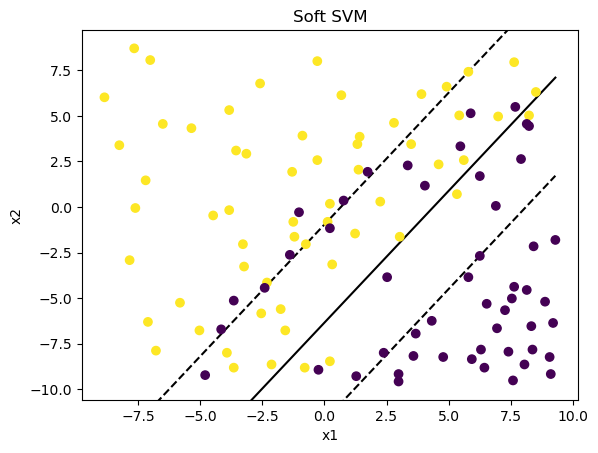

In [15]:
# plot the data
margin = 1/np.linalg.norm(w[1])

plt.scatter(x[:, 0], x[:, 1], c=y, zorder=10)

# plot the separating hyperplaneusing w and b
x_hyperplane = np.linspace(-8,x[:,0].max())
y_hyperplane = - (w[0] * x_hyperplane + b) / w[1]
upper_margin = y_hyperplane + margin
lower_margin = y_hyperplane - margin
plt.plot(x_hyperplane, y_hyperplane, 'k-')
plt.plot(x_hyperplane, upper_margin, 'k--')
plt.plot(x_hyperplane, lower_margin, 'k--')
plt.ylim([x[:,1].min()-1, x[:,1].max()+1])
plt.title('Soft SVM')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

     pcost       dcost       gap    pres   dres
 0:  2.0644e+00  5.0524e+01  7e+02  3e+00  6e+02
 1:  1.9690e+01 -2.3059e+01  5e+01  1e-01  3e+01
 2:  1.1116e+01  1.1465e+00  1e+01  2e-02  4e+00
 3:  5.1661e+00  3.9158e+00  1e+00  2e-03  5e-01
 4:  4.6987e+00  4.3010e+00  4e-01  5e-04  1e-01
 5:  4.5752e+00  4.4251e+00  2e-01  1e-04  3e-02
 6:  4.5227e+00  4.4685e+00  5e-02  3e-05  7e-03
 7:  4.5033e+00  4.4844e+00  2e-02  9e-06  2e-03
 8:  4.4945e+00  4.4920e+00  3e-03  7e-07  2e-04
 9:  4.4932e+00  4.4931e+00  3e-05  8e-09  2e-06
10:  4.4931e+00  4.4931e+00  3e-07  8e-11  2e-08
Optimal solution found.


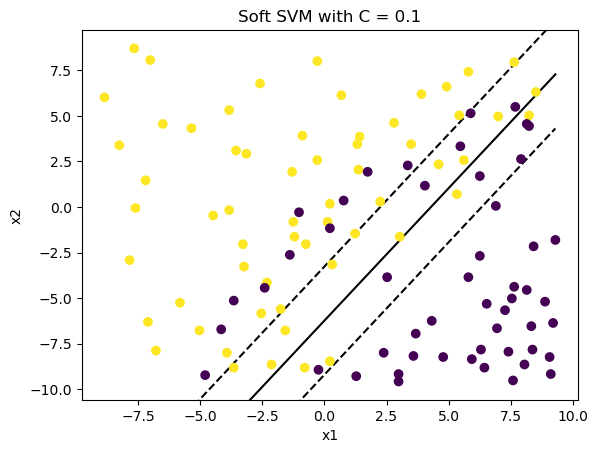

     pcost       dcost       gap    pres   dres
 0: -5.3430e+01  2.5866e+02  1e+03  4e+00  7e+01
 1:  1.3083e+02 -3.0700e+01  2e+02  5e-01  8e+00
 2:  5.6266e+01  3.4536e+01  2e+01  3e-02  5e-01
 3:  4.9781e+01  4.0113e+01  1e+01  1e-02  2e-01
 4:  4.6228e+01  4.2703e+01  4e+00  4e-03  6e-02
 5:  4.5200e+01  4.3715e+01  2e+00  1e-03  2e-02
 6:  4.4871e+01  4.3992e+01  9e-01  4e-04  6e-03
 7:  4.4528e+01  4.4306e+01  2e-01  8e-05  1e-03
 8:  4.4480e+01  4.4339e+01  1e-01  4e-05  7e-04
 9:  4.4429e+01  4.4388e+01  4e-02  4e-16  2e-14
10:  4.4408e+01  4.4407e+01  8e-04  3e-16  4e-13
11:  4.4407e+01  4.4407e+01  8e-06  3e-16  2e-13
Optimal solution found.


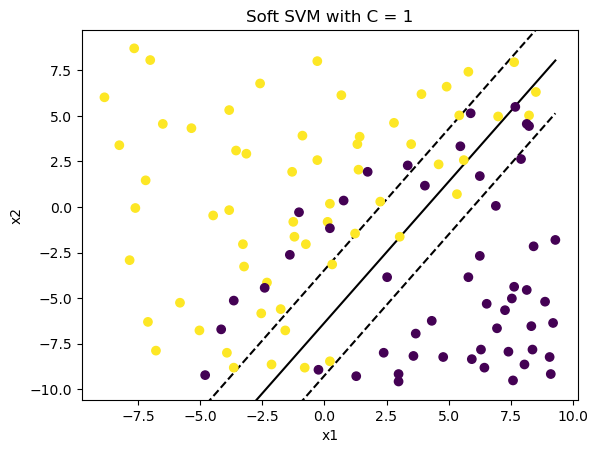

     pcost       dcost       gap    pres   dres
 0: -8.1935e+05  4.6922e+05  2e+06  2e+02  2e+01
 1:  1.4977e+05 -5.9743e+03  2e+05  4e+00  3e-01
 2:  8.0014e+03  2.6761e+03  6e+03  1e-01  8e-03
 3:  5.3250e+03  3.5779e+03  2e+03  3e-02  2e-03
 4:  5.1725e+03  3.8285e+03  1e+03  2e-02  1e-03
 5:  4.7825e+03  4.0969e+03  7e+02  8e-03  6e-04
 6:  4.6499e+03  4.2525e+03  4e+02  4e-03  3e-04
 7:  4.4915e+03  4.3960e+03  1e+02  1e-04  1e-05
 8:  4.4683e+03  4.4074e+03  6e+01  5e-05  4e-06
 9:  4.4356e+03  4.4342e+03  1e+00  8e-07  6e-08
10:  4.4348e+03  4.4348e+03  6e-02  3e-08  3e-09
11:  4.4348e+03  4.4348e+03  1e-03  6e-10  5e-11
Optimal solution found.


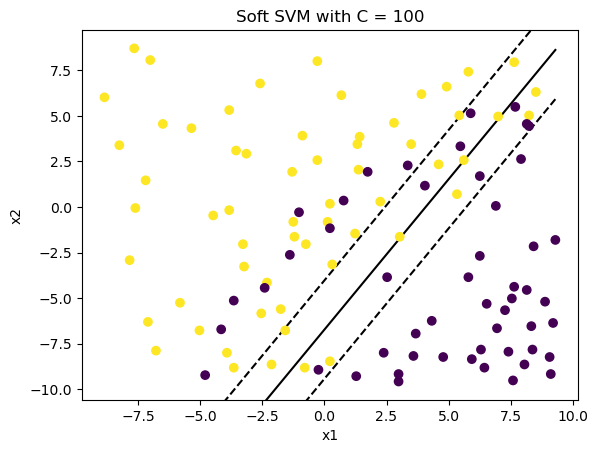

     pcost       dcost       gap    pres   dres
 0: -8.2223e+13  4.5071e+13  2e+14  2e+06  2e+01
 1:  1.4294e+13 -6.7821e+11  2e+13  3e+04  2e-01
 2:  2.5270e+11 -1.8156e+08  3e+11  4e+02  3e-03
 3:  2.5980e+09  2.6019e+07  3e+09  4e+00  3e-05
 4:  9.5287e+07  2.6381e+07  8e+07  1e-01  8e-07
 5:  5.5354e+07  3.4041e+07  2e+07  3e-02  2e-07
 6:  5.2265e+07  3.7746e+07  2e+07  2e-02  1e-07
 7:  4.8992e+07  4.0548e+07  9e+06  6e-03  5e-08
 8:  4.6404e+07  4.2701e+07  4e+06  2e-03  2e-08
 9:  4.4997e+07  4.3915e+07  1e+06  9e-05  7e-10
10:  4.4776e+07  4.4016e+07  8e+05  4e-05  3e-10
11:  4.4418e+07  4.4290e+07  1e+05  6e-06  5e-11
12:  4.4349e+07  4.4346e+07  3e+03  1e-07  1e-12
13:  4.4347e+07  4.4347e+07  2e+02  8e-09  7e-12
14:  4.4347e+07  4.4347e+07  2e+00  8e-11  2e-12
Optimal solution found.


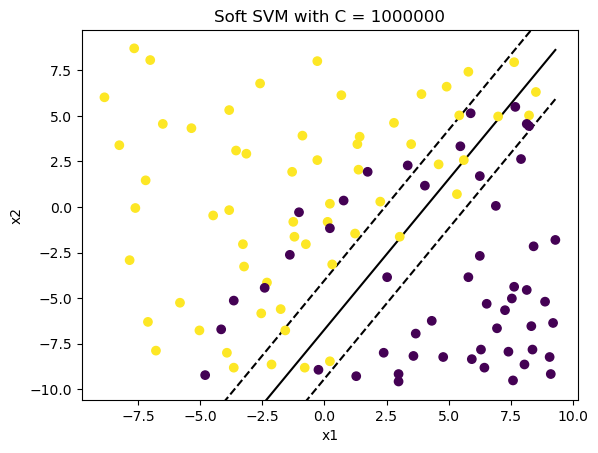

In [16]:
C = [0.1, 1, 100, 1000000]

for c in C:
    w, b, zeta = soft_svm(x, y, c)
    # plot the data
    margin = 1/np.linalg.norm(w)

    plt.scatter(x[:, 0], x[:, 1], c=y, zorder=10)

    # plot the separating hyperplaneusing w and b
    x_hyperplane = np.linspace(-8,x[:,0].max())
    y_hyperplane = - (w[0] * x_hyperplane + b) / w[1]
    upper_margin = y_hyperplane + margin
    lower_margin = y_hyperplane - margin
    plt.plot(x_hyperplane, y_hyperplane, 'k-')
    plt.plot(x_hyperplane, upper_margin, 'k--')
    plt.plot(x_hyperplane, lower_margin, 'k--')
    plt.ylim([x[:,1].min()-1, x[:,1].max()+1])
    plt.title(f'Soft SVM with C = {c}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

### Explain your observations here:

The value of C affects the softness of the margins, allowing points to get between the gutters. Small value of C let more points in, with a softer margin and large values of C make the margins hard. It shows in how wide the "street" is. Smaller values for C make the street wider and larger values make it smaller. We can see that by comparing the first plot with C = 0.1 and the final one with C = 1000000, the first plot has a noticeably wide street in comparison with more points inside.